# Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Datasets

In [2]:
businesses = pd.read_json('yelp_business.json', lines = True)

In [3]:
businesses.shape

(188593, 22)

In [4]:
businesses.head(3)

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,...,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",...,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",...,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",...,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0


In [5]:
reviews = pd.read_json('yelp_review.json', lines = True)

In [6]:
reviews.shape

(188593, 7)

In [7]:
reviews.head(3)

,business_id,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes
0,--1UhMGODdWsrMastO9DZw,524.458333,466.208333,0.808638,1,16,15
1,--6MefnULPED_I942VcFNA,1199.589744,785.205128,0.669126,27,32,53
2,--7zmmkVg-IMGaXbuVd0SQ,717.851852,536.592593,0.820837,29,52,81


In [8]:
users = pd.read_json('yelp_user.json', lines = True)

In [9]:
users.shape

(188593, 6)

In [10]:
users.head(3)

,business_id,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
0,--1UhMGODdWsrMastO9DZw,18.791667,1789.750000,1.833333,57.541667,0.833333
1,--6MefnULPED_I942VcFNA,214.564103,2039.948718,49.256410,332.743590,1.769231
2,--7zmmkVg-IMGaXbuVd0SQ,126.185185,1992.796296,19.222222,208.962963,1.814815


In [11]:
checkins = pd.read_json('yelp_checkin.json', lines = True)

In [12]:
checkins.shape

(157075, 4)

In [13]:
checkins.head(3)

,business_id,time,weekday_checkins,weekend_checkins
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': ...",76,75
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-1...",4,3
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16'...",3,3


In [14]:
tips = pd.read_json('yelp_tip.json', lines = True)

In [15]:
tips.shape

(121526, 3)

In [16]:
tips.head(3)

,business_id,average_tip_length,number_tips
0,--1UhMGODdWsrMastO9DZw,79.000000,1
1,--6MefnULPED_I942VcFNA,49.857143,14
2,--7zmmkVg-IMGaXbuVd0SQ,52.500000,10


In [17]:
photos = pd.read_json('yelp_photo.json', lines = True)

In [18]:
photos.shape

(32976, 3)

In [19]:
photos.head(3)

,business_id,average_caption_length,number_pics
0,--1UhMGODdWsrMastO9DZw,0.000000,1
1,--6MefnULPED_I942VcFNA,67.500000,2
2,--9e1ONYQuAa-CB_Rrw7Tw,30.426471,136


In [20]:
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

In [21]:
%who

LinearRegression	 businesses	 checkins	 np	 pd	 photos	 plt	 reviews	 tips	 
train_test_split	 users	 


In [22]:
businesses.head(1)

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1


In [23]:
reviews.head(3)

,business_id,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes
0,--1UhMGODdWsrMastO9DZw,524.458333,466.208333,0.808638,1,16,15
1,--6MefnULPED_I942VcFNA,1199.589744,785.205128,0.669126,27,32,53
2,--7zmmkVg-IMGaXbuVd0SQ,717.851852,536.592593,0.820837,29,52,81


In [24]:
users.head(3)

,business_id,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
0,--1UhMGODdWsrMastO9DZw,18.791667,1789.750000,1.833333,57.541667,0.833333
1,--6MefnULPED_I942VcFNA,214.564103,2039.948718,49.256410,332.743590,1.769231
2,--7zmmkVg-IMGaXbuVd0SQ,126.185185,1992.796296,19.222222,208.962963,1.814815


In [25]:
checkins.head(3)

,business_id,time,weekday_checkins,weekend_checkins
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': 2, 'Fri-1': 1, 'Sat-1': 3, 'Thu-1': 1, 'Wed-1': 1, 'Sat-2': 1, 'Sun-2': 2, 'Thu-2': 1, 'Wed-2': 1, 'Fri-3': 1, 'Sun-3': 3, 'Mon-4': 1, 'Thu-4': 1, 'Tue-4': 2, 'Wed-4': 2, 'Sun-6': 1, 'Wed-6': 1, 'Thu-7': 1, 'Fri-10': 3, 'Mon-10': 1, 'Sat-10': 3, 'Sun-10': 3, 'Tue-10': 2, 'Mon-11': 1, 'Thu-11': 1, 'Wed-11': 2, 'Mon-12': 1, 'Sat-12': 1, 'Tue-12': 1, 'Sat-13': 3, 'Thu-13': 1, 'Tue-13': 2, 'Wed-13': 3, 'Fri-14': 2, 'Mon-14': 1, 'Sat-14': 1, 'Sun-14':...",76,75
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-17': 1, 'Sun-19': 1, 'Thu-20': 1, 'Sat-21': 1}",4,3
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16': 1, 'Sun-22': 1, 'Fri-23': 1}",3,3


In [26]:
tips.head(3)

,business_id,average_tip_length,number_tips
0,--1UhMGODdWsrMastO9DZw,79.000000,1
1,--6MefnULPED_I942VcFNA,49.857143,14
2,--7zmmkVg-IMGaXbuVd0SQ,52.500000,10


In [27]:
photos.head(3)

,business_id,average_caption_length,number_pics
0,--1UhMGODdWsrMastO9DZw,0.000000,1
1,--6MefnULPED_I942VcFNA,67.500000,2
2,--9e1ONYQuAa-CB_Rrw7Tw,30.426471,136


In [28]:
len(businesses)

188593

In [29]:
reviews.columns

Index(['business_id', 'average_review_age', 'average_review_length',
       'average_review_sentiment', 'number_funny_votes', 'number_cool_votes',
       'number_useful_votes'],
      dtype='object')

In [30]:
users.describe()

,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
count,188593.000000,188593.000000,188593.000000,188593.000000,188593.000000
mean,105.132000,2005.367009,11.590148,122.110660,0.923313
std,162.653680,554.174540,25.901801,208.814471,1.109289
min,1.000000,76.000000,0.000000,0.666667,0.000000
25%,26.666667,1647.000000,0.666667,21.000000,0.000000
50%,59.384615,1957.150000,3.583333,62.142857,0.583333
75%,117.666667,2312.238095,11.555556,143.454545,1.400000
max,4219.000000,4860.000000,1174.666667,6335.000000,10.666667


# Merge the Data

In [28]:
%who

LinearRegression	 businesses	 checkins	 np	 pd	 photos	 plt	 reviews	 tips	 
train_test_split	 users	 


In [29]:
df = pd.merge(businesses, reviews, how = 'left', on = 'business_id')

In [30]:
df = pd.merge(df, users, how = 'left', on = 'business_id')

In [31]:
df = pd.merge(df, checkins, how = 'left', on = 'business_id')

In [32]:
df = pd.merge(df, tips, how = 'left', on = 'business_id')

In [33]:
df = pd.merge(df, photos, how = 'left', on = 'business_id')

## Viewing Merged DataFrame

In [34]:
df.shape

(188593, 40)

In [35]:
df.head(1)

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite,time,weekday_checkins,weekend_checkins,average_tip_length,number_tips,average_caption_length,number_pics
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1,618.25,532.916667,0.865342,6,5,13,42.833333,1809.375,5.375,114.875,1.125,"{'Fri-0': 1, 'Sun-0': 3, 'Thu-0': 1, 'Fri-1': 1, 'Fri-16': 1, 'Tue-17': 1, 'Sat-18': 1, 'Tue-18': 2, 'Wed-18': 1, 'Fri-19': 2, 'Thu-19': 2, 'Sat-20': 3, 'Thu-20': 1, 'Tue-20': 1, 'Sat-21': 2, 'Tue-21': 1, 'Fri-22': 1, 'Sat-22': 1, 'Thu-22': 1, 'Fri-23': 1, 'Sat-23': 1}",11.0,18.0,38.0,6.0,NaN,NaN


# Clean the Data

In [36]:
df.columns

Index(['address', 'alcohol?', 'attributes', 'business_id', 'categories',
       'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'price_range', 'review_count', 'stars', 'state',
       'take_reservations', 'takes_credit_cards', 'average_review_age',
       'average_review_length', 'average_review_sentiment',
       'number_funny_votes', 'number_cool_votes', 'number_useful_votes',
       'average_number_friends', 'average_days_on_yelp', 'average_number_fans',
       'average_review_count', 'average_number_years_elite', 'time',
       'weekday_checkins', 'weekend_checkins', 'average_tip_length',
       'number_tips', 'average_caption_length', 'number_pics'],
      dtype='object')

In [37]:
features_to_remove = ['address', 'attributes', 'business_id', 'categories', 'city', 'hours', 'is_open', 'latitude', 'longitude',\
                      'name', 'neighborhood', 'postal_code', 'state', 'time']

In [38]:
df.drop(features_to_remove, axis = 1, inplace = True)

In [39]:
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins               True
weekend_checkins               True
average_tip_length             True
number_tips                    True
average_caption_length         True
number_pics                    True
dtype: bool

In [40]:
df.fillna({
            'weekday_checkins': 0,      
            'weekend_checkins': 0,     
            'average_tip_length': 0,    
            'number_tips': 0,           
            'average_caption_length': 0,
            'number_pics': 0}, inplace = True)           

In [41]:
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins              False
weekend_checkins              False
average_tip_length            False
number_tips                   False
average_caption_length        False
number_pics                   False
dtype: bool

In [42]:
df.head()

,alcohol?,good_for_kids,has_bike_parking,has_wifi,price_range,review_count,stars,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite,weekday_checkins,weekend_checkins,average_tip_length,number_tips,average_caption_length,number_pics
0,0,1,0,0,2,24,4.0,1,1,618.250000,532.916667,0.865342,6,5,13,42.833333,1809.375000,5.375000,114.875000,1.125000,11.0,18.0,38.0,6.0,0.0,0.0
1,0,1,0,0,2,3,4.5,0,1,371.666667,481.333333,0.975000,0,1,1,64.333333,970.333333,2.666667,19.666667,0.666667,0.0,1.0,66.0,1.0,29.0,1.0
2,1,1,1,1,2,5,4.0,1,0,1106.200000,252.000000,0.301240,0,2,1,4.200000,1499.600000,1.000000,24.600000,0.600000,2.0,5.0,32.0,1.0,0.0,0.0
3,0,0,0,0,0,8,1.5,0,0,398.500000,672.625000,-0.060500,1,0,3,12.500000,1626.500000,2.375000,68.000000,0.250000,1.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,4,2.0,0,1,1412.750000,1015.500000,0.372550,0,0,4,137.750000,2570.000000,26.750000,528.250000,4.250000,2.0,0.0,0.0,0.0,0.0,0.0


# Renaming Columns

In [43]:
df.rename(columns = {"alcohol?": "Alcohol?", "good_for_kids": "Kids Friendly?", "has_bike_parking": "Bikes' Parking?",\
                     "has_wifi": "Wi-Fi?", "price_range": "Price Range",\
                     "review_count": "No. Reviews", "stars": "No. Stars", "take_reservations": "Reservations Acceptance", \
                     "takes_credit_cards": "Credit Cards' Acceptance", "average_review_age": "Avg. Review Age (Days)", \
                     "average_review_length": "Avg. Review Length (Words)", "average_review_sentiment": "Avg. Review Sentiment", \
                     "number_funny_votes": "No. Funny Votes", "number_cool_votes": "No. Cool Votes", \
                     "number_useful_votes": "No. Useful Votes", "average_number_friends": "Avg. No. Friends", \
                     "average_days_on_yelp": "Avg. No. Yelp's Days", "average_number_fans": "Avg. No. Fans", \
                     "average_review_count": "Avg. Review Count", "average_number_years_elite": "Avg. No. Elite Years", \
                     "weekday_checkins": "Weekdays Checkins", "weekend_checkins": "Weekend Checkins",\
                     "average_tip_length": "Avg. Tip Length", "number_tips": "No. Tips", \
                     "average_caption_length": "Avg. Caption Length", "number_pics": "No. Photos"}, inplace = True)

In [44]:
df.head()

,Alcohol?,Kids Friendly?,Bikes' Parking?,Wi-Fi?,Price Range,No. Reviews,No. Stars,Reservations Acceptance,Credit Cards' Acceptance,Avg. Review Age (Days),Avg. Review Length (Words),Avg. Review Sentiment,No. Funny Votes,No. Cool Votes,No. Useful Votes,Avg. No. Friends,Avg. No. Yelp's Days,Avg. No. Fans,Avg. Review Count,Avg. No. Elite Years,Weekdays Checkins,Weekend Checkins,Avg. Tip Length,No. Tips,Avg. Caption Length,No. Photos
0,0,1,0,0,2,24,4.0,1,1,618.250000,532.916667,0.865342,6,5,13,42.833333,1809.375000,5.375000,114.875000,1.125000,11.0,18.0,38.0,6.0,0.0,0.0
1,0,1,0,0,2,3,4.5,0,1,371.666667,481.333333,0.975000,0,1,1,64.333333,970.333333,2.666667,19.666667,0.666667,0.0,1.0,66.0,1.0,29.0,1.0
2,1,1,1,1,2,5,4.0,1,0,1106.200000,252.000000,0.301240,0,2,1,4.200000,1499.600000,1.000000,24.600000,0.600000,2.0,5.0,32.0,1.0,0.0,0.0
3,0,0,0,0,0,8,1.5,0,0,398.500000,672.625000,-0.060500,1,0,3,12.500000,1626.500000,2.375000,68.000000,0.250000,1.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,4,2.0,0,1,1412.750000,1015.500000,0.372550,0,0,4,137.750000,2570.000000,26.750000,528.250000,4.250000,2.0,0.0,0.0,0.0,0.0,0.0


# Exploratory Analysis

## Correlations

In [45]:
# I wrote [1:] to exclude No. Stars from correlating with itself

correlations = pd.DataFrame(df.corr()['No. Stars']).sort_values(by = 'No. Stars', ascending = False).reset_index()[1:]

In [46]:
positives = correlations[:11]

In [47]:
negatives = correlations[11:]

In [48]:
negatives = negatives.sort_values(by = 'No. Stars', ascending = True)

In [49]:
positives[:2]

,index,No. Stars
1,Avg. Review Sentiment,0.782187
2,Bikes' Parking?,0.068084


In [50]:
negatives[:3]

,index,No. Stars
25,Avg. Review Length (Words),-0.277081
24,Avg. Review Age (Days),-0.125645
23,Avg. Review Count,-0.066572


Text(0, 0.5, 'Yelp Rating')

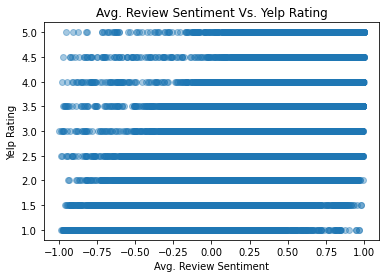

In [86]:
%matplotlib inline

plt.scatter(df['Avg. Review Sentiment'], df['No. Stars'], alpha = 0.4)

plt.title("Avg. Review Sentiment Vs. Yelp Rating")
plt.xlabel("Avg. Review Sentiment")
plt.ylabel("Yelp Rating")

Text(0, 0.5, 'Yelp Rating')

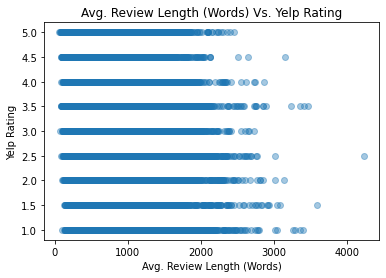

In [87]:
%matplotlib inline

plt.scatter(df['Avg. Review Length (Words)'], df['No. Stars'], alpha = 0.4)

plt.title("Avg. Review Length (Words) Vs. Yelp Rating")
plt.xlabel("Avg. Review Length (Words)")
plt.ylabel("Yelp Rating")

Text(0, 0.5, 'Yelp Rating')

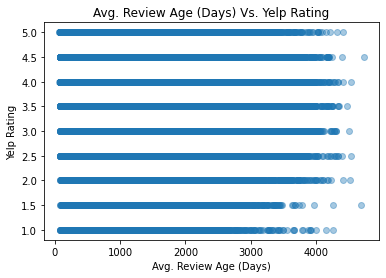

In [88]:
%matplotlib inline

plt.scatter(df['Avg. Review Age (Days)'], df['No. Stars'], alpha = 0.4)

plt.title("Avg. Review Age (Days) Vs. Yelp Rating")
plt.xlabel("Avg. Review Age (Days)")
plt.ylabel("Yelp Rating")

Text(0, 0.5, 'Yelp Rating')

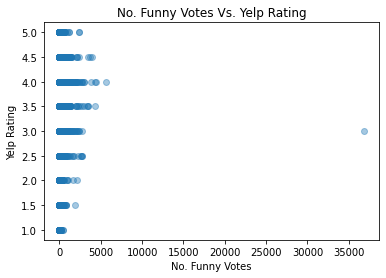

In [89]:
%matplotlib inline

plt.scatter(df['No. Funny Votes'], df['No. Stars'], alpha = 0.4)

plt.title("No. Funny Votes Vs. Yelp Rating")
plt.xlabel("No. Funny Votes")
plt.ylabel("Yelp Rating")

# Data Selection

In [56]:
features = df[['Avg. Review Length (Words)', 'Avg. Review Age (Days)']]

In [57]:
stars = df['No. Stars']

# Splitting the Data into Training and Testing Sets

In [58]:
X_train, X_test, y_train, y_test = train_test_split(features, stars, test_size = 0.2, random_state = 1)

# Create and Train the Model

In [59]:
Regressor = LinearRegression()

In [60]:
Regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
Regressor.coef_

array([-0.00099772, -0.00011622])

In [62]:
Regressor.intercept_

4.360264694313472

# Evaluating

In [63]:
Regressor.score(X_train, y_train)

0.08250309566544889

In [64]:
Regressor.score(X_test, y_test)

0.08083081210060561

In [65]:
sorted(list(zip(['Avg. Review Length', 'Avg. Review Age (Days)'], Regressor.coef_)), key = lambda x: abs(x[1]), reverse = True)

[('Avg. Review Length', -0.0009977176852074556),
 ('Avg. Review Age (Days)', -0.00011621626836366475)]

In [66]:
y_predicted = Regressor.predict(X_test)

(1.0, 5.0)

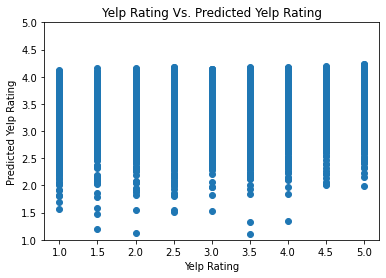

In [90]:
%matplotlib inline

plt.scatter(y_test, y_predicted)

plt.title("Yelp Rating Vs. Predicted Yelp Rating")
plt.xlabel('Yelp Rating')
plt.ylabel('Predicted Yelp Rating')
plt.ylim(1,5)

# Define Different Subsets of Data

In [68]:
# subset of only average review sentiment
sentiment = ['Avg. Review Sentiment']

In [69]:
# subset of all features that have a response range [0,1]
binary_features = ['Alcohol?', 'Bikes\' Parking?', 'Credit Cards\' Acceptance', 'Kids Friendly?', 'Reservations Acceptance', 'Wi-Fi?']

In [70]:
# subset of all features that vary on a greater range than [0,1]
numeric_features = ['No. Reviews', 'Price Range', 'Avg. Caption Length', 'No. Photos', 'Avg. Review Age (Days)', \
                    'Avg. Review Length (Words)', 'Avg. Review Sentiment', 'No. Funny Votes', 'No. Cool Votes', \
                    'No. Useful Votes', 'Avg. Tip Length', 'No. Tips', 'Avg. No. Friends', 'Avg. No. Yelp\'s Days',\
                    'Avg. No. Fans', 'Avg. Review Count', 'Avg. No. Elite Years', 'Weekdays Checkins', 'Weekend Checkins']

In [71]:
# all features
all_features = binary_features + numeric_features

# Further Modeling

In [92]:
# take a list of features to model as a parameter

def model(features):
    
    # Defining ratings and features, with the features limited to our chosen subset of data
    y = df['No. Stars']
    X = df[features]
    
    # Splitting Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    
    if len(X_train.shape) < 2:
        X_train = np.array(X_train).reshape(-1, 1)
        X_test = np.array(X_test).reshape(-1, 1)
    
    # Creating and fitting the model
    Regressor = LinearRegression()
    Regressor.fit(X_train, y_train)
    
    # Getting score
    train_score = Regressor.score(X_train ,y_train)
    test_score = Regressor.score(X_test, y_test)
    print('Train Score:', train_score)
    print('Test Score:', test_score)
    
    # print the model features and their corresponding coefficients, from most predictive to least predictive
    print(sorted( list(zip(features, Regressor.coef_)), key =  lambda x: abs(x[1]), reverse = True))
    
    # Calculate the predicted Yelp ratings from the test data
    y_predicted = Regressor.predict(X_test)
    
    #Visualizing
    plt.scatter(y_test, y_predicted)
    plt.xlabel('Yelp Rating')
    plt.ylabel('Predicted Yelp Rating')
    plt.ylim(1, 5)
    
    return test_score

In [93]:
scores = []

Train Score: 0.6118980950438655
Test Score: 0.6114021046919492
[('Avg. Review Sentiment', 2.303390843374967)]


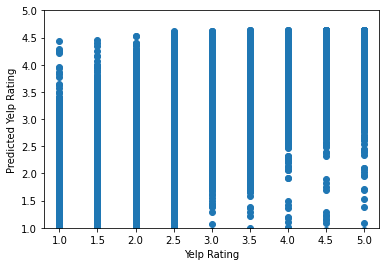

In [94]:
# create a model on sentiment here
%matplotlib inline

t_score = model(sentiment)
scores.append(t_score)

Train Score: 0.012223180709591164
Test Score: 0.010119542202269072
[("Bikes' Parking?", 0.1900300820804082), ('Alcohol?', -0.14549670708138862), ('Wi-Fi?', -0.13187397577762405), ('Kids Friendly?', -0.08632485990337223), ("Credit Cards' Acceptance", 0.07175536492195503), ('Reservations Acceptance', 0.04526558530451638)]


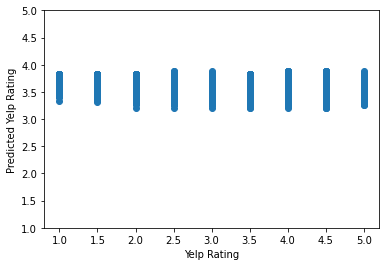

In [95]:
# create a model on all binary features here
%matplotlib inline

t_score = model(binary_features)
scores.append(t_score)

Train Score: 0.6734992593766658
Test Score: 0.671331879812014
[('Avg. Review Sentiment', 2.2721076642095936), ('Price Range', -0.08046080962701439), ('Avg. No. Elite Years', -0.0719036628805436), ('Avg. Caption Length', -0.003347066007782819), ('No. Photos', -0.002956502812895655), ('No. Tips', -0.0015953050789038138), ('No. Cool Votes', 0.001146883922707851), ('Avg. No. Fans', 0.001051060209742578), ('Avg. Review Length (Words)', -0.000581365569209496), ('Avg. Tip Length', -0.0005322032063460583), ('No. Useful Votes', -0.000232037847587313), ('Avg. Review Count', -0.00022431702895015803), ('Avg. Review Age (Days)', -0.0001693060816508145), ("Avg. No. Yelp's Days", 0.0001287802587670616), ('Weekdays Checkins', 5.918580754507574e-05), ('Weekend Checkins', -5.518176207028325e-05), ('Avg. No. Friends', 4.826992111620438e-05), ('No. Reviews', -3.483483763727778e-05), ('No. Funny Votes', -7.8843956734717e-06)]


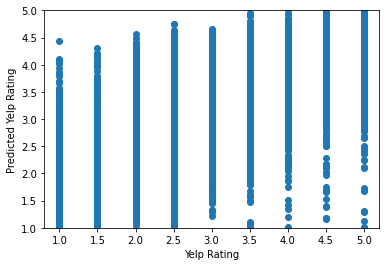

In [96]:
# create a model on all numeric features here
%matplotlib inline

t_score = model(numeric_features)
scores.append(t_score)

Train Score: 0.6807828861895335
Test Score: 0.6782129045869247
[('Avg. Review Sentiment', 2.280845699662376), ('Alcohol?', -0.14991498593468827), ('Wi-Fi?', -0.12155382629262114), ('Kids Friendly?', -0.11807814422013084), ('Price Range', -0.06486730150042139), ('Avg. No. Elite Years', -0.06278939713895307), ("Bikes' Parking?", 0.027296969912250748), ("Credit Cards' Acceptance", 0.024451837853643337), ('Reservations Acceptance', 0.014134559172964217), ('No. Photos', -0.001313361230080161), ('Avg. No. Fans', 0.00102679868226579), ('No. Cool Votes', 0.0009723722734412956), ('No. Tips', -0.0008546563320875719), ('Avg. Caption Length', -0.0006472749798196717), ('Avg. Review Length (Words)', -0.0005896257920272506), ('Avg. Tip Length', -0.0004205217503404025), ('No. Useful Votes', -0.0002715064125618206), ('Avg. Review Count', -0.0002339835690251034), ('Avg. Review Age (Days)', -0.0001577654411132445), ("Avg. No. Yelp's Days", 0.00012326147662883313), ('No. Reviews', 0.00010112259377372382),

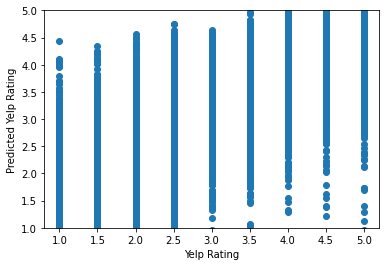

In [97]:
# create a model on all features here
%matplotlib inline

t_score = model(all_features)
scores.append(t_score)

In [78]:
scores

[0.6114021046919492,
 0.010119542202269072,
 0.671331879812014,
 0.6782129045869247]

In [79]:
x_scores_labels = ['sentiment', 'binary_features', 'numeric_features', 'all_features']

Text(0.5, 1.0, 'Choice of Features Vs. Score')

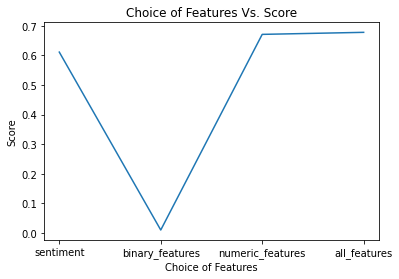

In [98]:
%matplotlib inline

plt.plot(x_scores_labels, scores)

plt.xlabel("Choice of Features")
plt.ylabel("Score")
plt.title("Choice of Features Vs. Score")

# Epilogue: Making Predictions

In [81]:
print(all_features)

['Alcohol?', "Bikes' Parking?", "Credit Cards' Acceptance", 'Kids Friendly?', 'Reservations Acceptance', 'Wi-Fi?', 'No. Reviews', 'Price Range', 'Avg. Caption Length', 'No. Photos', 'Avg. Review Age (Days)', 'Avg. Review Length (Words)', 'Avg. Review Sentiment', 'No. Funny Votes', 'No. Cool Votes', 'No. Useful Votes', 'Avg. Tip Length', 'No. Tips', 'Avg. No. Friends', "Avg. No. Yelp's Days", 'Avg. No. Fans', 'Avg. Review Count', 'Avg. No. Elite Years', 'Weekdays Checkins', 'Weekend Checkins']


In [82]:
features = df.loc[:, all_features]
ratings = df.loc[:, 'No. Stars']
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
pd.DataFrame(list(zip(features.columns, features.describe().loc['mean'], features.describe().loc['min'], \
                      features.describe().loc['max'])), columns =['Feature', 'Mean', 'Min', 'Max'])

,Feature,Mean,Min,Max
0,Alcohol?,0.140610,0.000000,1.000000
1,Bikes' Parking?,0.350692,0.000000,1.000000
2,Credit Cards' Acceptance,0.700243,0.000000,1.000000
3,Kids Friendly?,0.279029,0.000000,1.000000
4,Reservations Acceptance,0.106086,0.000000,1.000000
5,Wi-Fi?,0.134968,0.000000,1.000000
6,No. Reviews,31.797310,3.000000,7968.000000
7,Price Range,1.035855,0.000000,4.000000
8,Avg. Caption Length,2.831829,0.000000,140.000000
9,No. Photos,1.489939,0.000000,1150.000000


In [84]:
danielles_delicious_delicacies = np.array([0,1,1,1,1,1,10,2,3,10,10,1200,0.9,3,6,5,50,3,50,1800,12,123,0.5,0,0]).reshape(1,-1)

In [85]:
model.predict(danielles_delicious_delicacies)

array([4.03799004])